In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Other:
from scipy import stats

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
#pd.set_option('display.max_columns', 10)

# Eerst kijken welke geslachten er zijn
display(df_co2['geslacht'].value_counts())

# Er zijn 2 "anders" geslacht dus we droppen deze values
df_co2 = df_co2[df_co2['geslacht'].isin(['man', 'vrouw'])]
display(df_co2['geslacht'].value_counts())

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

geslacht
vrouw     778
man       720
anders      2
Name: count, dtype: int64

geslacht
vrouw    778
man      720
Name: count, dtype: int64

# Deel A: Data exploratie en voorbereiding

### 1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.

| Variabele | Meetniveau |
| --- | --- |
| persoon_ID | Geen |
| geslacht | Nominaal |
| leeftijd | Ratio |
| gewicht_KG | Ratio |
| burgerlijke_staat | Nominaal |
| jaarsalaris_eu | Ratio |
| huishouden_grootte | Ratio |
| stad | Nominaal |
| provincie | Nominaal |
| opleiding_niveau | Ordinaal |
| autobezit | Nominaal |
| fietsbezit | Nominaal |
| elektrisch_auto | Nominaal |
| km_auto_per_jaar | Ratio |
| km_fiets_per_jaar | Ratio |
| km_ov_per_jaar | Ratio |
| km_vliegtuig_per_jaar | Ratio |
| dagen_thuiswerken_per_week_pro_rato | Ratio |
| dagen_kantoorwerken_per_week_pro_rato | Ratio |
| dagen_in_buitenland_per_jaar | Ratio |
| gebruik_carsharing | Ordinaal |
| co2_uitstoot_per_jaar_KG | Ratio |

In [2]:
# 1
# Gemaakt in markdown. Wellicht dat we al eerder het ID droppen? Deze gaan we toch niet gebruiken
# Mischien ook verstandig om hier ook toelichting bij te geven als dit nodig is?

### 2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Dit helpt ons om te bepalen welke statistische methode we gaan gebruiken en om te bepalen hoe we de data gaan voorbewerken.<br>
(Mischien nog wat dieper op in gaan)

### 3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Data kwaliteit rapport van:      geslacht  leeftijd  gewicht_KG burgerlijke_staat  jaarsalaris_eu  \
0         man        50       52.66  weduwe/weduwnaar        48003.64   
1       vrouw        65       64.58       samenwonend        55208.63   
2         man        49       90.87       samenwonend        29533.78   
3         man        34       80.43            gehuwd        44453.27   
4         man        60       72.28          ongehuwd        56497.64   
...       ...       ...         ...               ...             ...   
1495      man        78       85.84  weduwe/weduwnaar        28295.50   
1496      man        54       85.09          ongehuwd        45963.45   
1497      man        48       71.79  weduwe/weduwnaar        43443.92   
1498      man        76       69.02            gehuwd        33158.29   
1499      man        61       40.47  weduwe/weduwnaar        30786.00   

      huishouden_grootte        stad      provincie opleiding_niveau  \
0                      

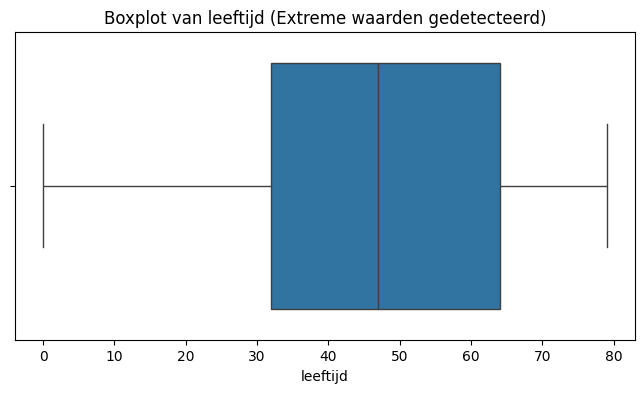

 - gewicht_KG: 1488 extreme waarden


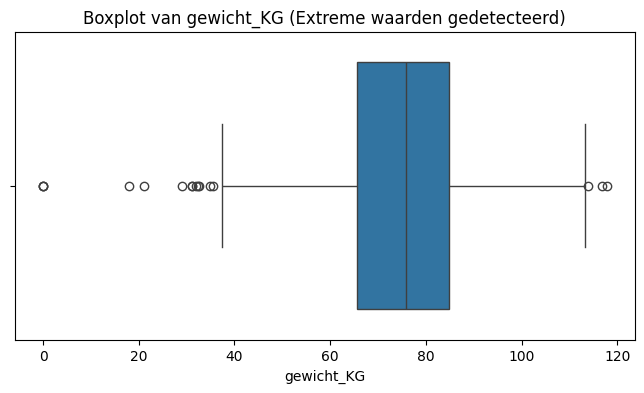

 - jaarsalaris_eu: 1490 extreme waarden


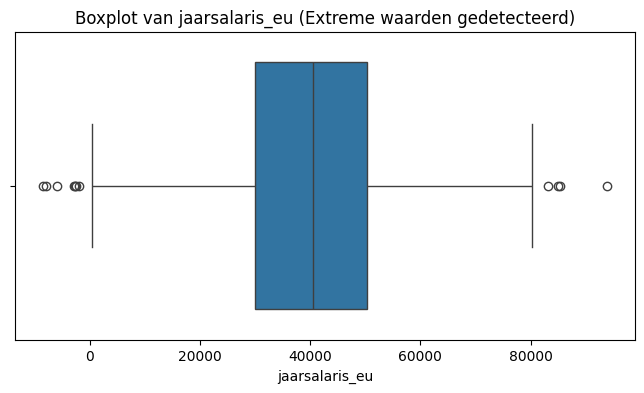

 - huishouden_grootte: 1498 extreme waarden


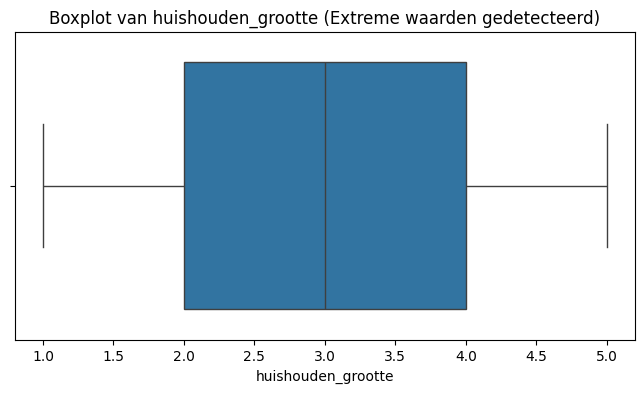

 - km_auto_per_jaar: 1498 extreme waarden


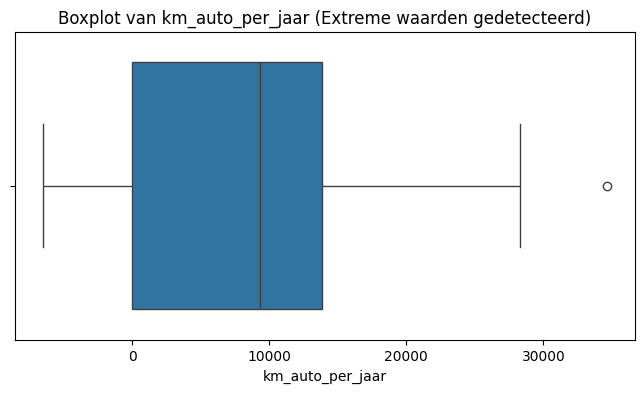

 - km_fiets_per_jaar: 1353 extreme waarden


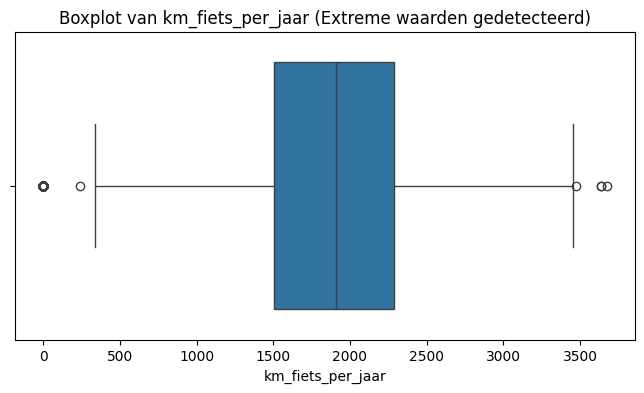

 - km_ov_per_jaar: 1492 extreme waarden


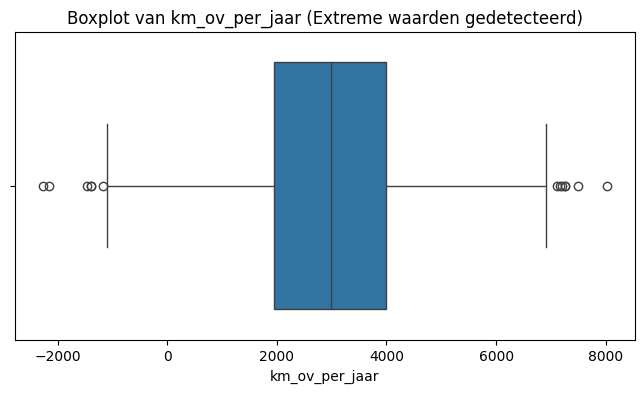

 - km_vliegtuig_per_jaar: 1498 extreme waarden


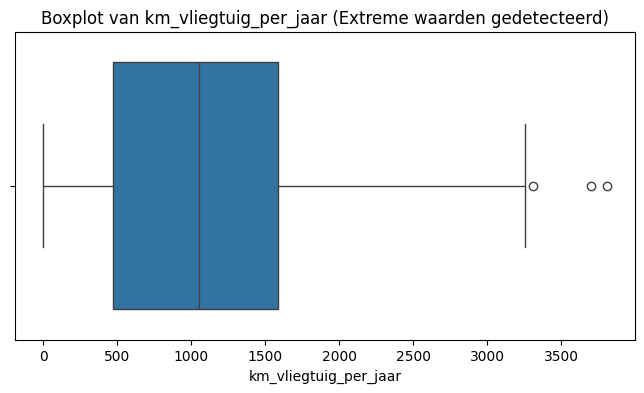

 - dagen_thuiswerken_per_week_pro_rato: 1498 extreme waarden


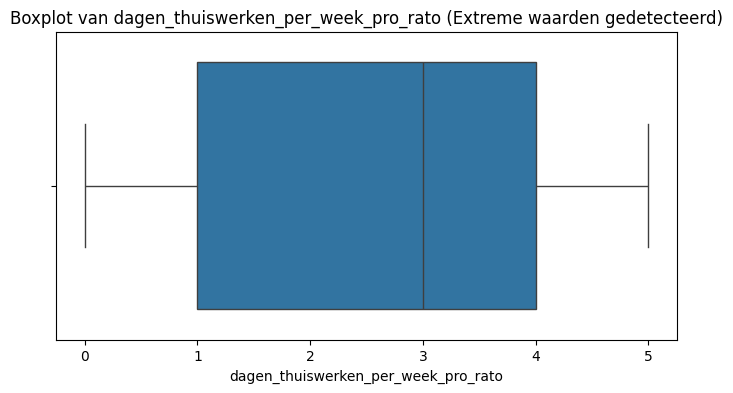

 - dagen_kantoorwerken_per_week_pro_rato: 1498 extreme waarden


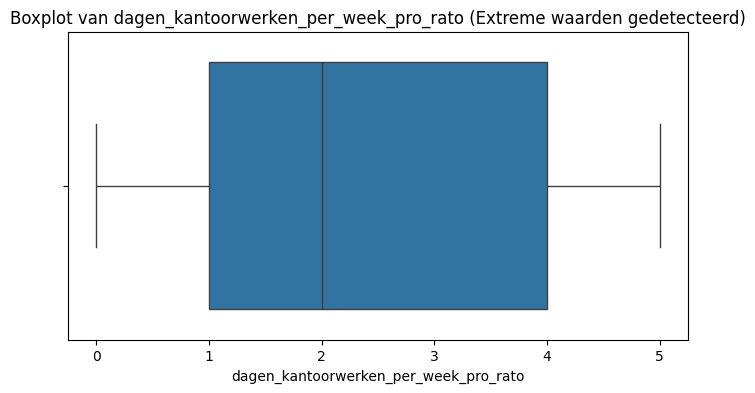

 - dagen_in_buitenland_per_jaar: 1498 extreme waarden


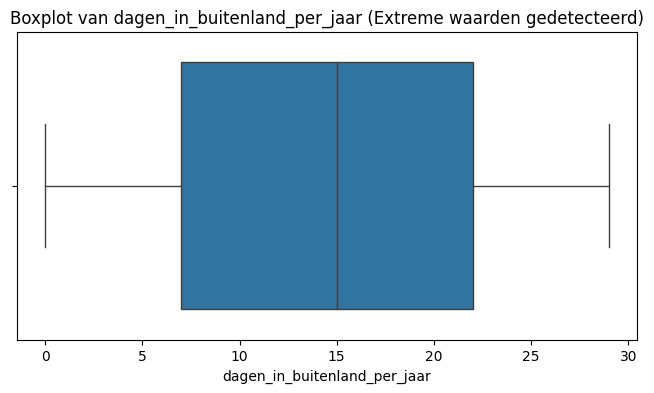

 - co2_uitstoot_per_jaar_KG: 1491 extreme waarden


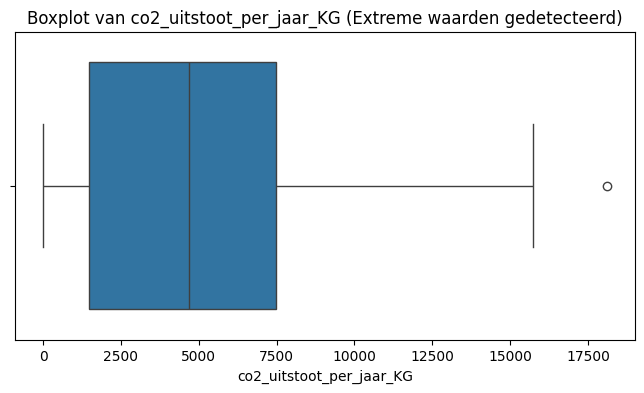

/tmp/ipykernel_357/3101121033.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")


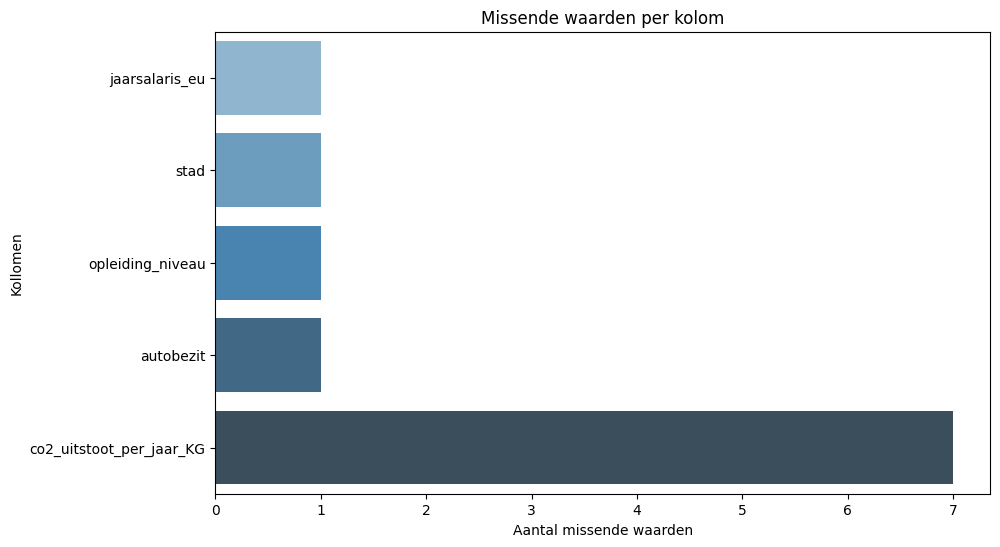

/tmp/ipykernel_357/3101121033.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")


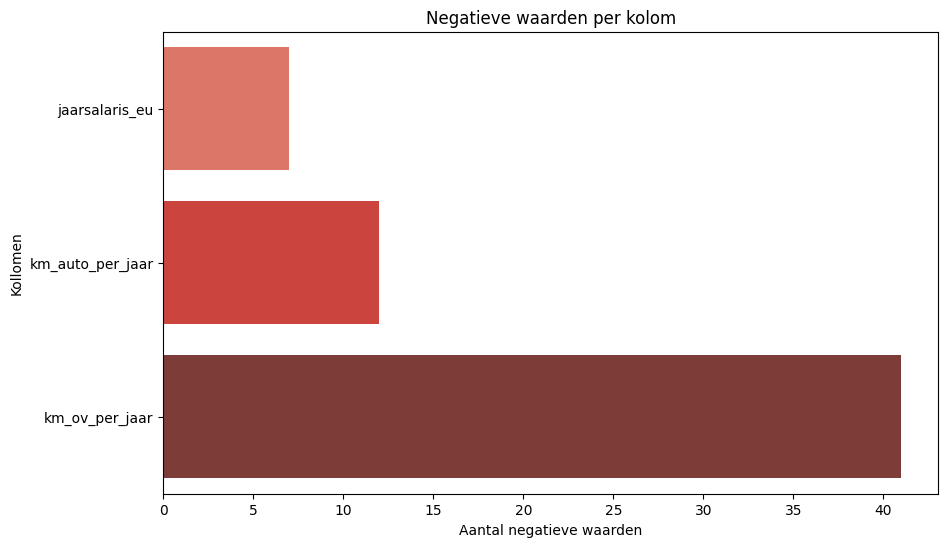

In [3]:
# 3

# Verwijder ID kolom
if 'persoon_ID' in df_co2.columns:
    df_co2 = df_co2.drop('persoon_ID', axis=1)

def data_kwaliteit_check(df):
    """
    Data kwaliteit rapport, toont missende waarden, negatieve waarde en extreme waarde
    """
    print(f"Data kwaliteit rapport van: {df}\n")

    # Totaal missende waarden:
    totaal_missend = df.isnull().sum().sum()
    print(f"Totaal aantal missende waarden: {totaal_missend}\n")

    # Missende waarden per kolom:
    missend_kolom = df.isnull().sum()
    print("Missende waarden per kolom:")
    print(missend_kolom[missend_kolom > 0])
    print()

    # Totaal aantal negatieve waarden:
    df_numeriek = df.select_dtypes(include=[np.number])
    totaal_negatief = (df_numeriek < 0).sum().sum()
    print(f"Totaal aantal negatiefe waarden in numerieke kollomen: {totaal_negatief}\n")

    # Negatieve waarden per kolom:
    negatief_per_kolom = (df_numeriek < 0).sum()
    print("Negatieve waarden per kolom:")
    print(negatief_per_kolom[negatief_per_kolom > 0])
    print()

    # Extreme waarden met hulp van IQR
    print("Extreme waarden gedetecteerd:")
    for col in df_numeriek.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        laag = Q1 - 2.5 * IQR
        hoog = Q3 - 2.5 * IQR

        extreem_aantal = ((df[col] < laag) | (df[col] > hoog)).sum()
        if extreem_aantal > 0:
            print(f" - {col}: {extreem_aantal} extreme waarden")
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot van {col} (Extreme waarden gedetecteerd)")
            plt.show()
    print()

    # Missende waarden per kolom plot
    missend = missend_kolom[missend_kolom > 0]
    if not missend.empty:
        plt.figure(figsize=(10,6))
        sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")
        plt.xlabel("Aantal missende waarden")
        plt.ylabel("Kollomen")
        plt.title("Missende waarden per kolom")
        plt.show()
    else:
        print("Geen missende waarden om te visualizeren")
    
    # Negatieve waarden per kolom plot
    negatief = negatief_per_kolom[negatief_per_kolom > 0]
    if not negatief.empty:
        plt.figure(figsize=(10,6))
        sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")
        plt.xlabel("Aantal negatieve waarden")
        plt.ylabel("Kollomen")
        plt.title("Negatieve waarden per kolom")
        plt.show()
    else:
        print("Geen negatieve waarden om te visualizeren")

data_kwaliteit_check(df_co2)

We zien hier nu dat er 7 missende waarden zijn in de co2 kolom. Dat is nouw net de belangrijkste kolom voor ons. Verder missen er van 4 andere kollomen ook 1 waarden, ik ga er vanuit dat dit dezelfde rij is en verwijder deze.

We verwijderen deze en doen de check nogmaals

Data kwaliteit rapport van:      geslacht  leeftijd  gewicht_KG burgerlijke_staat  jaarsalaris_eu  \
0         man        50       52.66  weduwe/weduwnaar        48003.64   
1       vrouw        65       64.58       samenwonend        55208.63   
2         man        49       90.87       samenwonend        29533.78   
3         man        34       80.43            gehuwd        44453.27   
4         man        60       72.28          ongehuwd        56497.64   
...       ...       ...         ...               ...             ...   
1495      man        78       85.84  weduwe/weduwnaar        28295.50   
1496      man        54       85.09          ongehuwd        45963.45   
1497      man        48       71.79  weduwe/weduwnaar        43443.92   
1498      man        76       69.02            gehuwd        33158.29   
1499      man        61       40.47  weduwe/weduwnaar        30786.00   

      huishouden_grootte        stad      provincie opleiding_niveau  \
0                      

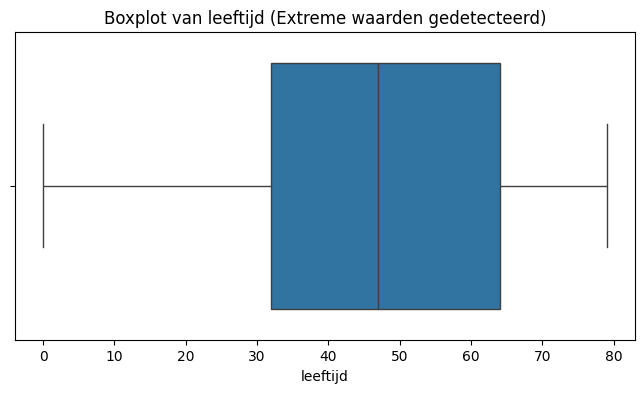

 - gewicht_KG: 1477 extreme waarden


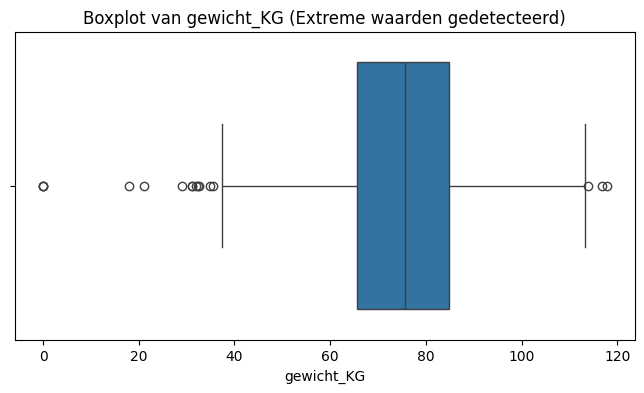

 - jaarsalaris_eu: 1487 extreme waarden


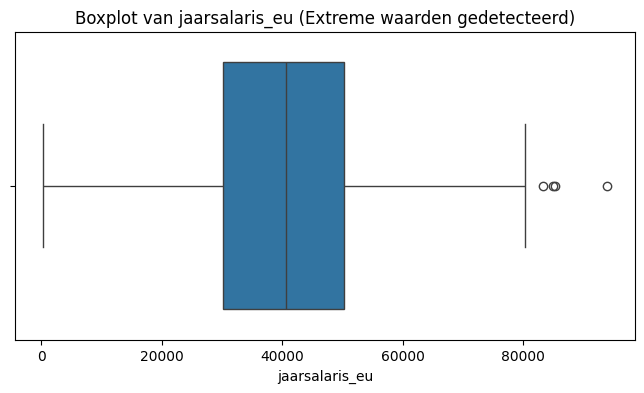

 - huishouden_grootte: 1487 extreme waarden


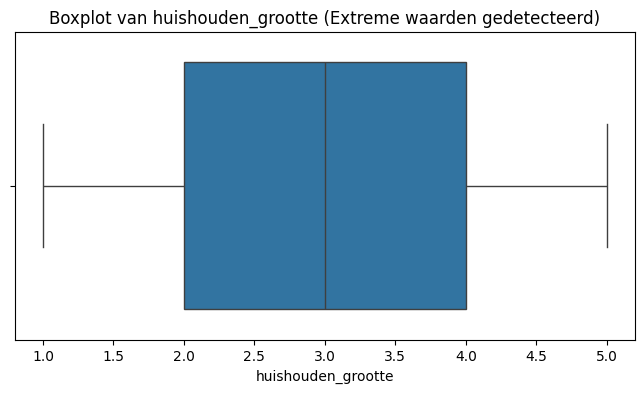

 - km_auto_per_jaar: 1487 extreme waarden


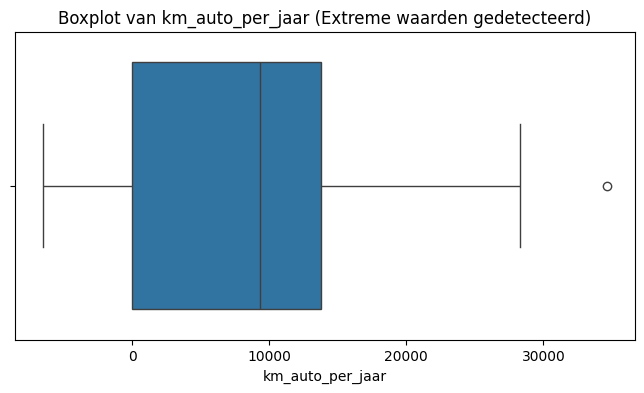

 - km_fiets_per_jaar: 1343 extreme waarden


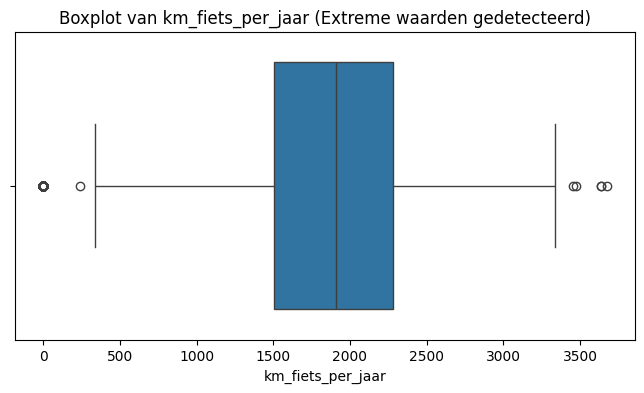

 - km_ov_per_jaar: 1480 extreme waarden


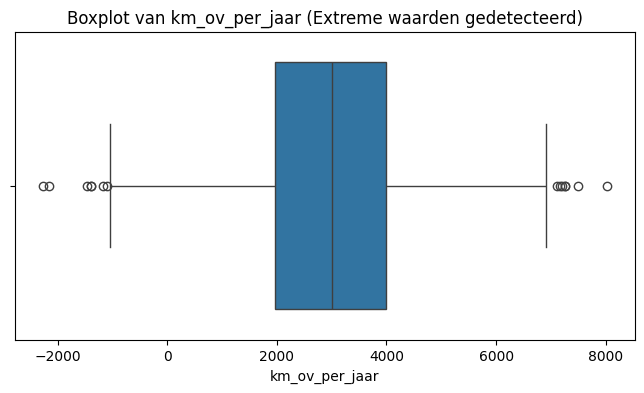

 - km_vliegtuig_per_jaar: 1487 extreme waarden


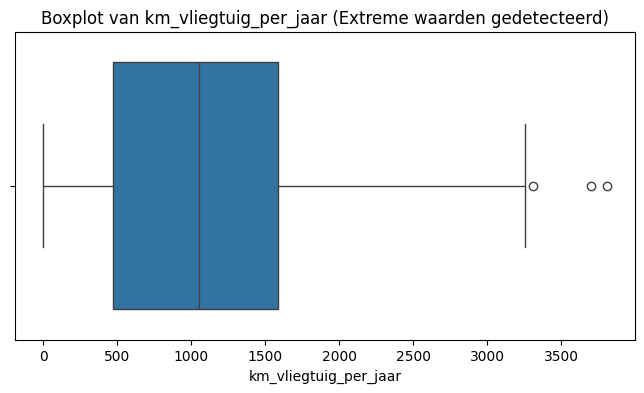

 - dagen_thuiswerken_per_week_pro_rato: 1487 extreme waarden


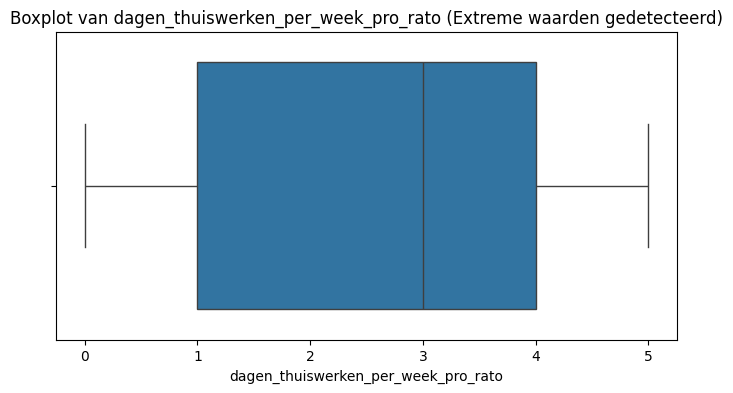

 - dagen_kantoorwerken_per_week_pro_rato: 1487 extreme waarden


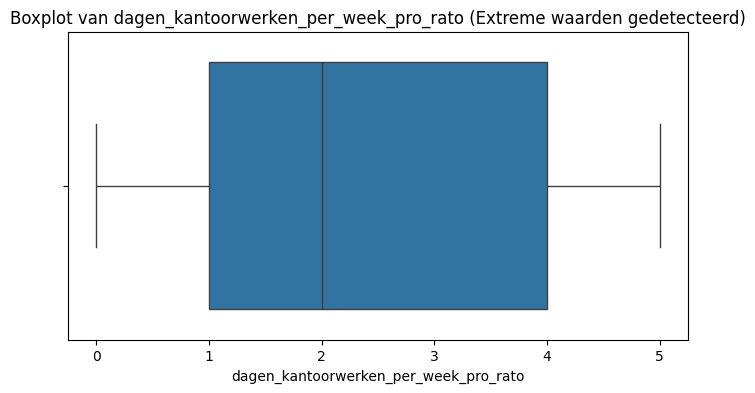

 - dagen_in_buitenland_per_jaar: 1487 extreme waarden


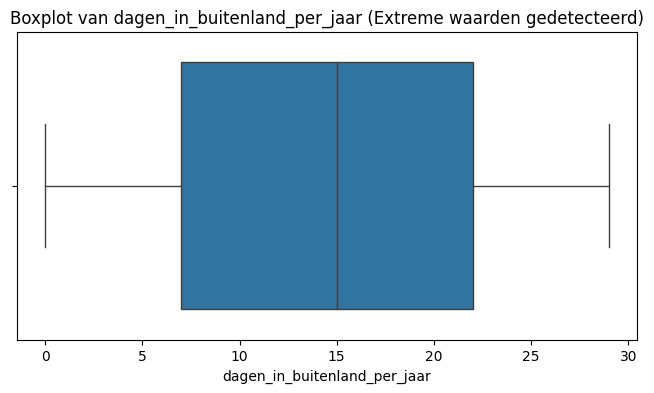

 - co2_uitstoot_per_jaar_KG: 1487 extreme waarden


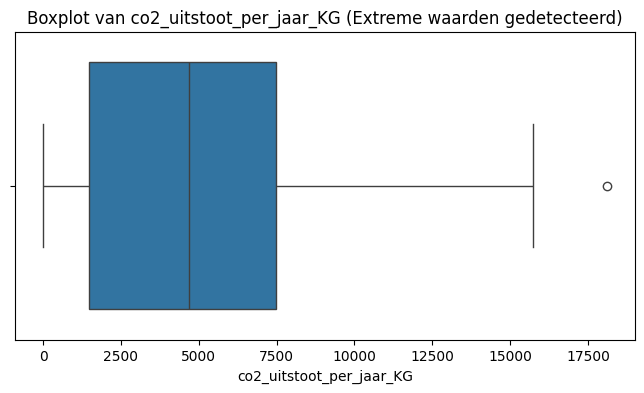


Geen missende waarden om te visualizeren


/tmp/ipykernel_357/3101121033.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")


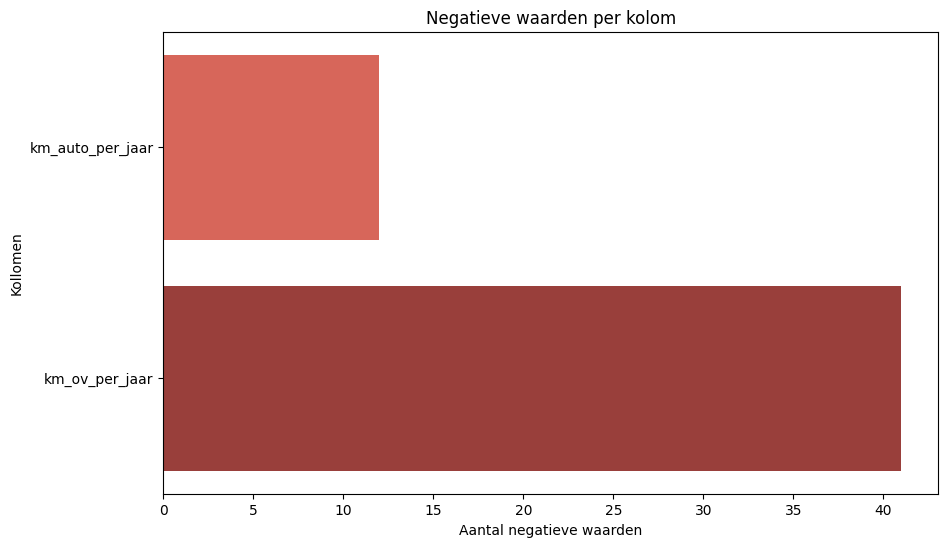

In [4]:
df_co2 = df_co2.dropna(subset=['co2_uitstoot_per_jaar_KG', 'autobezit', 'jaarsalaris_eu', 'stad', 'opleiding_niveau'])
data_kwaliteit_check(df_co2)

We gaan verder niks doen met de uitschieters (voorlopig) aangezien dit nog niks ernstigs doet. Wel gaan we ervoor zorgen dat er geen negatieve getallen staan waar dit niet kan.

Je kan bijvoorbeeld niet -200 km per jaar hebben gereden.

We veranderen alle negatieve waarden naar NaN zodat we later kunnen beslissen wat we er mee doen. Het zal zeker kunnen dat dit 0 hoort te zijn, of misschien hoort de - er hellemaal niet.

In [5]:
# Kollomen definieren
foute_kollomen = ['km_auto_per_jaar', 'km_ov_per_jaar']
for col in foute_kollomen:
    df_co2.loc[df_co2[col] < 0, col] = np.nan

### 4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

Ik ga hiervoor eerst kijken wat de correlaties zijn tussen de data met een heatmap

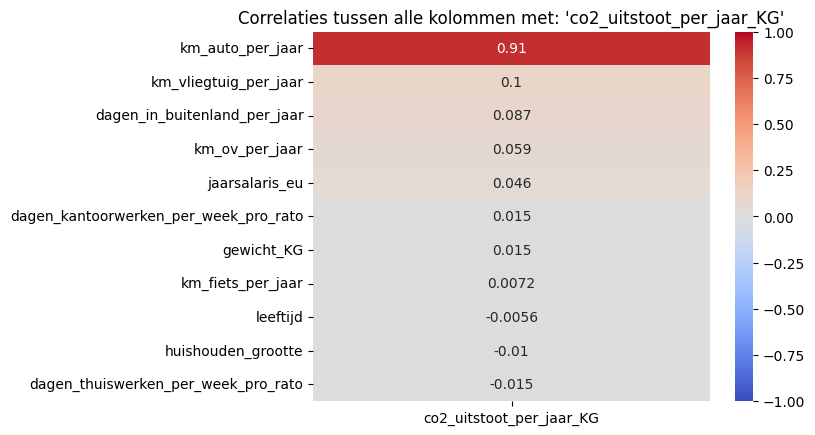

In [6]:
# 4
# Heatmap configuratie
df_co2_numeriek = df_co2.select_dtypes(include=[np.number])
co2_kolom = "co2_uitstoot_per_jaar_KG"
correlaties = df_co2_numeriek.corr()[[co2_kolom]].drop(co2_kolom)
correlaties = correlaties.sort_values(by=co2_kolom, ascending=False)

# Heatmap
sns.heatmap(correlaties, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlaties tussen alle kolommen met: '{co2_kolom}'")
plt.show()

We halen hieruit dat de 2 onafhankelijke variabelen die het meeste invloed hebben km auto per jaar en km vliegtuig per jaar zijn.

Deze visualiseren wij hieronder in een histplot samen met de co2 uitstoot

Verder visualiseren wij ook de verdeling van co2 tenopzichte van km vliegtuig en km auto

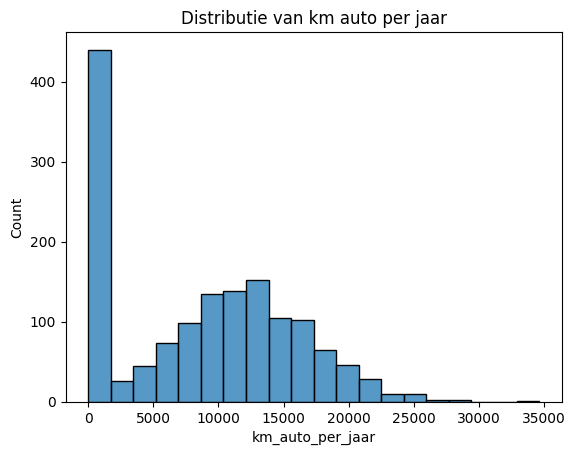

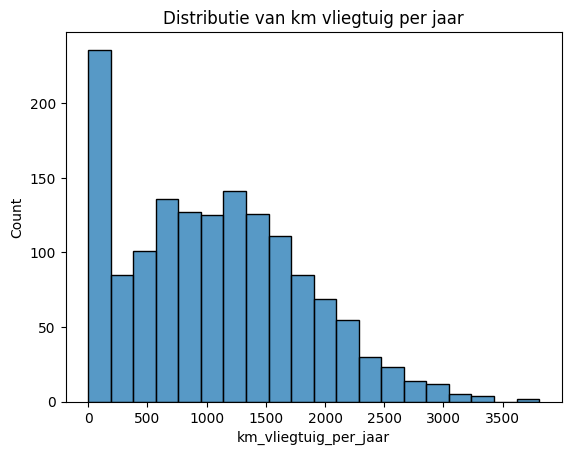

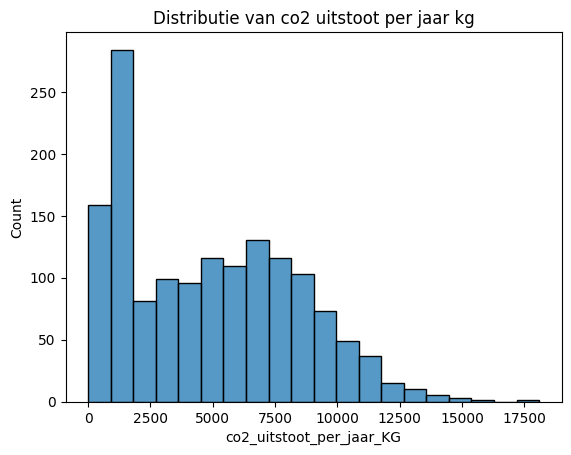

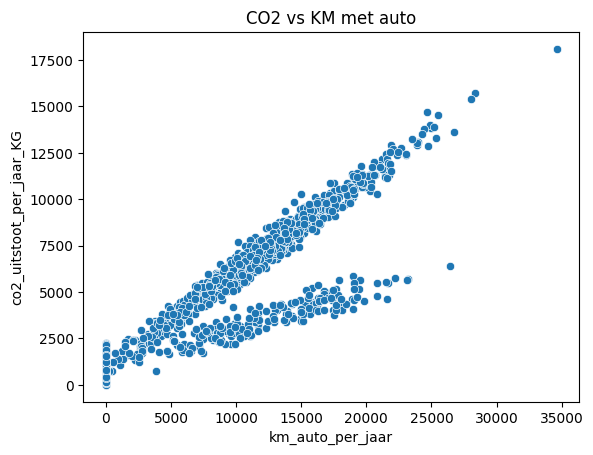

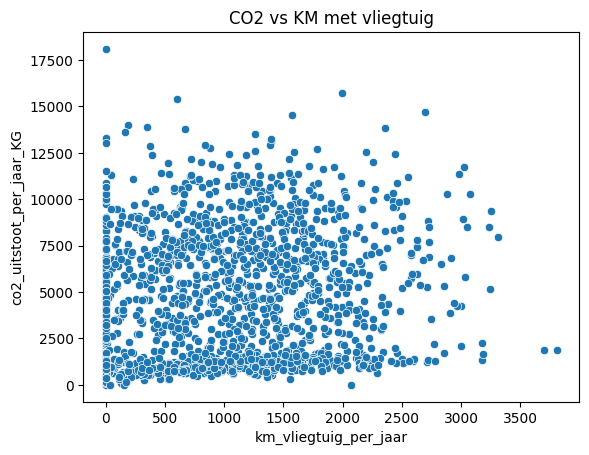

In [7]:
sns.histplot(df_co2_numeriek['km_auto_per_jaar'], kde=False, bins=20)
plt.title('Distributie van km auto per jaar')
plt.show()

sns.histplot(df_co2_numeriek['km_vliegtuig_per_jaar'], kde=False, bins=20)
plt.title('Distributie van km vliegtuig per jaar')
plt.show()

sns.histplot(df_co2_numeriek['co2_uitstoot_per_jaar_KG'], kde=False, bins=20)
plt.title('Distributie van co2 uitstoot per jaar kg')
plt.show()

sns.scatterplot(x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', data=df_co2_numeriek)
plt.title('CO2 vs KM met auto')
plt.show()

sns.scatterplot(x='km_vliegtuig_per_jaar', y='co2_uitstoot_per_jaar_KG', data=df_co2_numeriek)
plt.title('CO2 vs KM met vliegtuig')
plt.show()

Wat mij het meeste opvalt is dat het heel erg duidelijk is dat km met de auto heel veel invloed heeft op de CO2 uitstoot, terwijl km vliegtuig vrijwel niks heeft.

Zo zien we ook dat de meest uitstotende persoon 0 km heeft gevlogen maar ook de meeste km met de auto heeft (ongeveer 35000)

### 5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Het is vrij duidelijk dat alle kollomen ook 0 waarden hebben, het is te zien dat bij km auto de meeste 0 is (rond de 3-400), vliegtuig heeft het ook erg ruig, zoals je op de scatterplot kan zien staan er veel punten bij de 0 maar deze kunnen wel een hoog co2 uitstoot hebben.

Om een duidelijke beschrijving van de visualisaties te geven haal ik eerst even wat basis informatie op.

In [8]:
# 5
# definieer variabelen om gemakkelijk de kollomen terug te halen
car_kpy = df_co2_numeriek['km_auto_per_jaar']
plane_kpy = df_co2_numeriek['km_vliegtuig_per_jaar']
co2_py = df_co2_numeriek['co2_uitstoot_per_jaar_KG']
# functie met informatie per kollom
def show_statistics(var):
    print(f"--- {var.name} ---")
    stats = var.describe()
    for stat, value in stats.items():
        print(f"{stat.capitalize():<12}: {value:.2f}")
    print(f"Median      : {var.median()}")
    print(f"Skewness    : {var.skew():.2f}")
    print(f"Kurtosis    : {var.kurt():.2f}")
    print(f"Null        : {var.isnull().sum()}")
    print("")
show_statistics(car_kpy)
show_statistics(plane_kpy)
show_statistics(co2_py)

--- km_auto_per_jaar ---
Count       : 1475.00
Mean        : 8666.76
Std         : 6974.58
Min         : 0.00
25%         : 0.00
50%         : 9407.52
75%         : 13847.78
Max         : 34618.87
Median      : 9407.52
Skewness    : 0.16
Kurtosis    : -0.96
Null        : 12

--- km_vliegtuig_per_jaar ---
Count       : 1487.00
Mean        : 1074.17
Std         : 749.59
Min         : 0.00
25%         : 471.49
50%         : 1055.27
75%         : 1589.76
Max         : 3808.20
Median      : 1055.27
Skewness    : 0.41
Kurtosis    : -0.34
Null        : 0

--- co2_uitstoot_per_jaar_KG ---
Count       : 1487.00
Mean        : 4913.62
Std         : 3422.60
Min         : 0.00
25%         : 1469.84
50%         : 4677.65
75%         : 7476.99
Max         : 18098.44
Median      : 4677.65
Skewness    : 0.44
Kurtosis    : -0.71
Null        : 0



#### **KM auto per jaar**

Voor deze kolom zijn er 12 missende waarden, dit kwam omdat deze hiervoor negatieve getallen waren en we deze nu naar NaN hebben gezet. Aangezien dit er maar 12 zijn van de 1477 is dit niet al te erg.<br>
We kunnen ook zien dat rond de 25% van de mensen niet rijdt, dit is best veel maar voor een land als Nederland vrij makkelijk te begrijpen.<br>
De max verschilt veel van de 75%, wat dus betekent dat er en uitschieter is, dat weten wij ook en deze heeft ook de hoogste co2 uitstoot.<br>
De distributie is vrij wijdt verdeeldt met een standard deviatie van 6973 en een gemiddeld van 8674.<br>
De mediaan van 9417 is lichtelijk boven het gemiddelde, wat in lijn is met de laage positieve skewness van 0.16<br>
Een kurtosis van -0.96 suggereert een platykurtische verdeling, platter dan normaal met weinig extreme waarden.

#### **KM vliegtuig per jaar**

Bij deze kolom zijn er geen missende waarden, ook laat de min weer zien dat er zeker een aantal mensen zijn die niet vliegen. Maar wel minder dan bij autos want bij 25% is er al 471 KM.<br>
Dit is natuurlijk niet veel (ongeveer van schiphol > dusseldorf en terug) maar is meer dan 0.<br>
Verder zien we ook dat er weer een aardig verschil tussen de 75% en de max zit (vrijwel het dubbele) verder moet ik ook zeggen dat zelfs de max niet realistisch is want alleen al naar Thailand is rond de 18000 km (heen en terug).<br>
De skewness wordt hier wel al wat positiever, maar is nogsteeds vrij laag.<br>
Met een kurtosis van -0.35 suggereert het ook weer een hele lichte platykurtische verdeling, maar het is nu wel heel laag.<br>

#### **CO2 uitstoot per jaar**

Er zijn geen missende waarden, maar er zijn wel een aantal waarden op 0, dit suggereert dat er sommige mensen CO2 neutraal zijn. Terwijl dit technisch gezien mogelijk is is het niet erg realistisch.<br>
Met hier ook weer de max meer dan het dubbele van de 75% suggereert dit dat er wat extreme waarden zijn, dit kunnen we ook aan de histplot zien.<br>
Met een skewness van 0.44 suggereert het weer een rechts scheve verdeling, maar dit is moeilijk te bepalen.<br>
Een kurtosis van -0.71 is weer een stuke hoger dan die van vliegtuigen maar is ook weer te laag om er iets definitiefs aan te hangen, het suggereert wel weer een platykurtische verdeling.

### 6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Hieronder hebben we een simpele functie gedefinieerd om de shapiro test uit te voeren op de variabelen. Zo kunnen we zien dat geen een van de variabelen normaal is verdeeld.

In [9]:
# 6
def normaal_verdeeld(var):
    stat, p = stats.shapiro(var.dropna())
    print(f"--- {var.name} ---")
    print(f"Normaal Verdeeld: {p > 0.05} ({p:.3g})")
    print("")

normaal_verdeeld(car_kpy)
normaal_verdeeld(plane_kpy)
normaal_verdeeld(co2_py)

--- km_auto_per_jaar ---
Normaal Verdeeld: False (4.25e-28)

--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (2.33e-18)

--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: False (3.19e-24)



### 7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

#### **Nominaal**

> Categorische data zonder volgorde (bijv. Stad, Gender, Merk)

**Actie:** Omzetten naar dummyvariabelen met `pd.get_dummies()`<br>
**Waarom:** Zo voorkomen we dat het model denkt dat er een logische volgorde of afstand is tussen de categorieën.

#### **Ordinaal**

> Categorische data met een betekenis maar onbekende afstand (bijv. Opleidings niveau)

**Actie:** Handmatig mappen naar numerieke waarden (bijv. `{'laag': 1, 'gemiddeld': 2, 'hoog': 3}`)<br>
**Waarom:** Zo behouden we de volgorde en kan het model begrijpen dat "hoog" meer betekent dan "laag".

#### **Interval**

> Numerieke data met gelijke afstanden, maar geen absoluut nulpunt (bijv. temperatuur in Celsius).

**Actie:** Standaardiseren met Z-score: `(x - mean) / std`<br>
**Waarom:** Machine Learning algoritmen presteren beter als de features vergelijkbare schalen hebben

#### **Ratio**

> Numerieke data met een absoluut nulpunt (bijv. gewicht, inkomen, afstand)

**Actie:** Standaardiseren of normaliseren<br>
**Waarom:** Hoewel deze variabelen een absoluut nulpunt hebben, kunnen schaalverschillen tussen ratio-variabelen alsnog ML-modellen beïnvloeden, dus ook hier blijft schalen belangrijk.


### 8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

Ik heb copies gemaakt van dataframes om de organelle niet te veranderen. Daarna heb ik aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 

In [10]:
# 8
from sklearn.preprocessing import StandardScaler

def transform_dataset(df, meetniveau_dict, ordinaal_mapping={}, gespiegelde_paren=[]):
    df_transform = pd.DataFrame(index=df.index)
    scaler = StandardScaler()

    for col, meetniveau in meetniveau_dict.items():
        if col not in df.columns:
            continue # Missende kollomen skippen

        if meetniveau == 'nominaal':
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df_transform = pd.concat([df_transform, dummies], axis=1)

        elif meetniveau == 'ordinaal':
            if col in ordinaal_mapping:
                df_transform[col] = df[col].map(ordinaal_mapping[col])
            else:
                raise ValueError(f"Missende ordinale mapping voor kolom: {col}")

        elif meetniveau in ['interval', 'ratio']:
            df_transform[col] = scaler.fit_transform(df[[col]])

        else:
            raise ValueError(f"Onbekend meetniveau: {meetniveau} voor kolom: {col}")

    # Gespiegelde kollomen
    for col1, col2 in gespiegelde_paren:
        if col1 in df and col2 in df:
            spiegel_sum = (df[col1] + df[col2]).dropna().unique()
            if len(spiegel_sum) == 1:
                print(f"Kollomen {col1} en {col2} zijn gespiegeld (som = {spiegel_sum[0]}), kolom {col2} wordt verwijdert")
                if col1 not in df_transform:
                    df_transform[col1] = df[col1]
            else:
                print(f"Kollomen {col1} en {col2} zijn niet gespiegeld")
                df_transform[col1] = df[col1]
                df_transform[col2] = df[col2]
        else:
            print(f"Een van de gespiegelde kollomen mist: {col1}, {col2}")

    return df_transform

# Meetniveau's per kolom
meetniveau_types = {
    'geslacht': 'nominaal',
    'leeftijd': 'ratio',
    'gewicht_KG': 'ratio',
    'burgerlijke_staat': 'nominaal',
    'jaarsalaris_eu': 'ratio',
    'huishouden_grootte': 'ratio',
    'stad': 'nominaal',
    'provincie': 'nominaal',
    'opleiding_niveau': 'ordinaal',
    'autobezit': 'nominaal',
    'fietsbezit': 'nominaal',
    'elektrisch_auto': 'nominaal',
    'km_auto_per_jaar': 'ratio',
    'km_fiets_per_jaar': 'ratio',
    'km_ov_per_jaar': 'ratio',
    'km_vliegtuig_per_jaar': 'ratio',
    'dagen_thuiswerken_per_week_pro_rato': 'ratio',
    'dagen_kantoorwerken_per_week_pro_rato': 'ratio',
    'dagen_in_buitenland_per_jaar': 'ratio',
    'gebruik_carsharing': 'ordinaal',
    'co2_uitstoot_per_jaar_KG': 'ratio'
}

# Ordinaal map
ordinaal_mappings = {
    'opleiding_niveau': {'MBO': 1, 'HBO': 2, 'WO': 3},
    'gebruik_carsharing': {'Nooit': 1, 'Heel soms': 2, 'Altijd': 3, 'Vaak': 4, 'Soms': 5}
}

# Mogelijke gespiegelde variabelen
gespiegelde_paren = [('dagen_thuiswerken_per_week_pro_rato', 'dagen_kantoorwerken_per_week_pro_rato')]

# Transformatie uitvoeren
df_transformed = transform_dataset(df_co2, meetniveau_types, ordinaal_mappings, gespiegelde_paren)
df_transformed

Kollomen dagen_thuiswerken_per_week_pro_rato en dagen_kantoorwerken_per_week_pro_rato zijn gespiegeld (som = 5), kolom dagen_kantoorwerken_per_week_pro_rato wordt verwijdert


,geslacht_vrouw,leeftijd,gewicht_KG,burgerlijke_staat_gescheiden,burgerlijke_staat_ongehuwd,burgerlijke_staat_samenwonend,burgerlijke_staat_weduwe/weduwnaar,jaarsalaris_eu,huishouden_grootte,stad_Amersfoort,stad_Amsterdam,stad_Apeldoorn,stad_Arnhem,stad_Assen,stad_Breda,stad_Delft,stad_Den Bosch,stad_Eindhoven,stad_Enschede,stad_Groningen,stad_Haarlem,stad_Hoofddorp,stad_Leeuwarden,stad_Leiden,stad_Maastricht,stad_Middelburg,stad_Nijmegen,stad_Rotterdam,stad_Tilburg,stad_Utrecht,stad_Venlo,stad_Zutphen,stad_Zwolle,provincie_Flevoland,provincie_Friesland,provincie_Gelderland,provincie_Groningen,provincie_Limburg,provincie_Noord-Brabant,provincie_Noord-Holland,provincie_Overijssel,provincie_Utrecht,provincie_Zeeland,provincie_Zuid-Holland,opleiding_niveau,autobezit_nee,fietsbezit_nee,elektrisch_auto_nee,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,False,0.114685,-1.519133,False,False,False,True,0.526483,1.395021,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1,False,False,True,0.659660,0.329211,0.125685,-0.791981,0.874481,-0.874481,0.634448,1,0.782798
1,True,0.943072,-0.712149,False,False,True,False,1.017802,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3,False,True,True,0.941327,-2.377533,-0.525331,0.465970,1.473999,-1.473999,-0.858493,2,1.119006
2,False,0.059460,1.067683,False,False,True,False,-0.733006,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,2,False,False,False,1.604438,-0.334137,1.020061,-0.589442,0.874481,-0.874481,-1.432702,3,-0.116927
3,False,-0.768927,0.360896,False,False,False,False,0.284377,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,2,False,False,True,0.181971,0.044521,0.952331,0.257119,0.274964,-0.274964,0.749290,2,0.581855
4,False,0.666943,-0.190859,False,True,False,False,1.105702,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1,False,False,False,1.090028,0.077882,-0.779602,0.803148,-1.523589,1.523589,-1.662385,1,-0.144039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,1.661007,0.727153,False,False,False,True,-0.817446,-1.438854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,2,False,False,True,-0.327518,2.494246,0.026091,0.240785,1.473999,-1.473999,-0.399127,2,-0.193582
1496,False,0.335588,0.676378,False,True,False,False,0.387359,1.395021,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,False,False,1.345909,0.152816,-1.262053,-0.222998,0.874481,-0.874481,-1.317860,2,-0.087095
1497,False,0.004234,-0.224032,False,False,False,True,0.215548,1.395021,False,False,False,False,False,False,False,F

### 9.	Welke methode(n) heb je gebruikt en waarom?

In [11]:
# 9

### 10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

Ja die is er.<br>

**Probleem:** Twee kollomen zijn het spiegelbeeld van elkaar, hierdoor is het lastiger om de coefficient van het model te interpreteren.<br>
**Oplossing:** We verwijderen een van de kollomen, in ons geval verwijderen we de kolom `dagen_thuiswerken_per_week_pro_rato`, hiermee houden we de kantoorwerken over.

In [12]:
df_transformed = df_transformed.drop('dagen_thuiswerken_per_week_pro_rato', axis=1)

11.	Bekijk de relatie tussen uitstoot CO2 en de andere onafhankelijke variabelen per geslacht. Kom je hier tot een andere conclusie dan bij vraag 8?

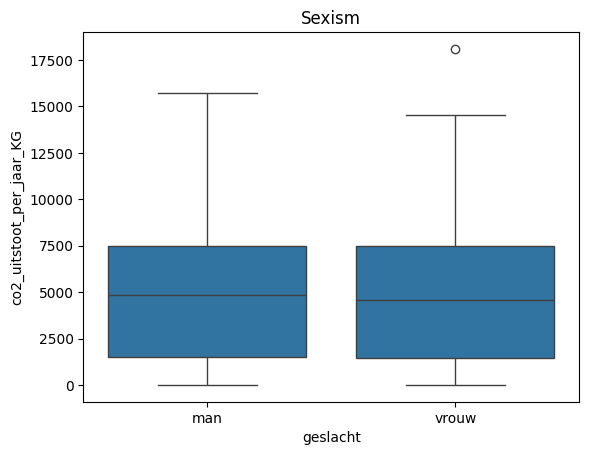

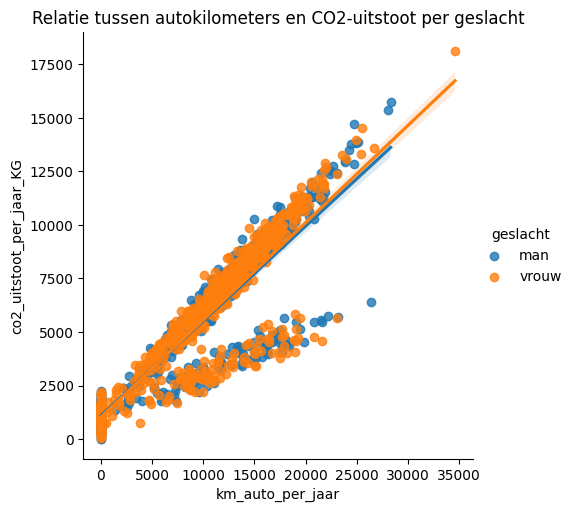

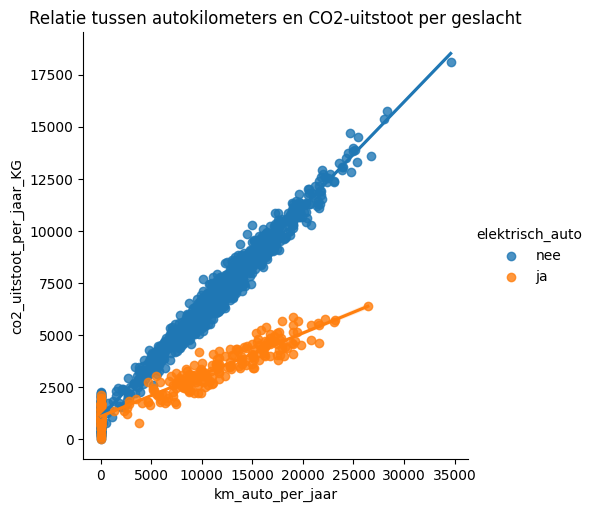

In [13]:
# 11
# Boxplot voor de geslachten
sns.boxplot(data=df_co2, x='geslacht', y='co2_uitstoot_per_jaar_KG')
plt.title("Sexism")
plt.show()

# Scatterplot met lijn voor geslacht
sns.lmplot(data=df_co2, x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', hue='geslacht')
plt.title('Relatie tussen autokilometers en CO2-uitstoot per geslacht')
plt.show()

# Scatterplot met lijn voor elektrisch auto bezit
sns.lmplot(data=df_co2, x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', hue='elektrisch_auto')
plt.title('Relatie tussen autokilometers en CO2-uitstoot per geslacht')
plt.show()

# Deel B: Kansrekenen

### 12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

Om deze vraag te beantwoorden moeten we hem eerst verbeteren.<br>
Er wordt hier gevraagt om 5000 KG CO2, de kans hierop is 0% aangezien het een continue variabelen is.<br>
Om dit beter te kunnen uitrekenen kunnen we een range pakken zoals 4800 - 5200.<br>

In [14]:
# 12

def get_chance(mean, std, upper_range, lower_range):
    """Retourneerd de mogelijkheid dat een waarde tussen de range valt"""
    z1 = (lower_range - mean) / std
    z2 = (upper_range - mean) / std
    return stats.norm.cdf(z2) - stats.norm.cdf(z1)

prob = get_chance(4913.62, 3422.6, 5200, 4800)
print(f"Kans: {prob:.4f}")

Kans: 0.0466


### 13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

In het kort:
> Deze code gebruikt calculus via de techniek van bepaalde integratie om de oppervlakte onder de normale verdelinscurve tussen twee waarden te bepalen. Deze oppervlakte geeft dan de waarschijnlijkheid weer dat een waarde binnen dat bereik valt.

### 14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

Om dit te beantworden moeten we eers de dataset opslitsen op geslacht<br>
Vervolgens gebruiken we dezelfde statistische toets als van te voren<br>
Hier pakken we dan de correcte waarden uit en voeren dezelfde toets uit om op het antwoord te komen

In [15]:
# Man en vrouw datasets
df_vrouw = df_co2[df_co2['geslacht'] == 'vrouw']
df_man = df_co2[df_co2['geslacht'] == 'man']

# Correcte kollomen uit de datasets halen
car_vrouw = df_vrouw['co2_uitstoot_per_jaar_KG']
car_man = df_man['co2_uitstoot_per_jaar_KG']

# Statistische toets
print("Vrouw")
show_statistics(car_vrouw)
print("Man")
show_statistics(car_man)

Vrouw
--- co2_uitstoot_per_jaar_KG ---
Count       : 770.00
Mean        : 4850.82
Std         : 3414.58
Min         : 0.00
25%         : 1436.05
50%         : 4580.53
75%         : 7458.71
Max         : 18098.44
Median      : 4580.535
Skewness    : 0.46
Kurtosis    : -0.69
Null        : 0

Man
--- co2_uitstoot_per_jaar_KG ---
Count       : 717.00
Mean        : 4981.06
Std         : 3432.31
Min         : 0.00
25%         : 1511.55
50%         : 4825.42
75%         : 7504.90
Max         : 15739.69
Median      : 4825.42
Skewness    : 0.42
Kurtosis    : -0.72
Null        : 0



In [16]:
# Kansrekening uitvoeren op basis van dezelfde range
prob_vrouw = get_chance(4850.82, 3414.85, 5200, 4800)
prob_man = get_chance(4981.06, 3432.31, 5200, 4800)
print(f"Kans vrouw: {prob_vrouw:.4f}")
print(F"Kans man: {prob_man:.4f}")

Kans vrouw: 0.0467
Kans man: 0.0465


De kans is miniscuul groter bij vrouwen tenopzichte van mannen. De algemene kans voor mannen en vrouwen licht er net tussen in.<br>

# Deel C: Toetsende statistiek

### 15.	Stel de hypothesen op.

In de hypothese testen we altijd:<br>
> **Null hypothese *H0***: Er is geen significant verschil tussen de groep en de referentie.<br>

> **Alternatieve hypothese *H1***: Er is een significant verschil.<br>

Voor deze hypothese gaan wij het volgende uitzoeken. Is deze dataset accuraat op cijfers van Milieu Centraal (8 ton per jaar = 8000kg per jaar). Hiervoor hebben we het gemiddelde nodig van onze dataset.

In [17]:
co2_gemiddeld = df_co2['co2_uitstoot_per_jaar_KG'].dropna()
co2_milieu_centraal = 8000

t_statistic, p_value = stats.ttest_1samp(co2_gemiddeld, co2_milieu_centraal)

print(f"Gemiddeld van sample: {np.mean(co2_gemiddeld):.2f} kg")
print(f"T-statistic: {t_statistic:.3f}")
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Er is een significant verschil voor uitstoot van de gemiddelde Nederlander van 8000kg CO2.")
else:
    print("Er is geen significant verschil voor uitstoot van de gemiddelde Nederlander van 8000kg CO2.")

Gemiddeld van sample: 4913.62 kg
T-statistic: -34.773
P-value: 2.350418854732316e-194
Er is een significant verschil voor uitstoot van de gemiddelde Nederlander van 8000kg CO2.


### 16.	Welke type fouten kunnen er gemaakt worden?

Er zijn twee verschillende soorten fouten die je kan maken voor hypothese opstellen:<br>
> **Type I Error (α)**: De null hypothese niet aanemen terwijl zij wel waar is.<br>
    False positive<br>
    Voorbeeld: Je concludeert dat er een significant verschil is maar die is er niet.

> **Type II Error (β)**: De null hypothese aanemen terwijl zij niet waar is.<br>
    False negative<br>
    Voorbeeld: Je concludeert dat er geen significant verschil is maar die is er wel.

### 17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

Bla bla bla

### 18.	Voer de toets uit.

Bla bla bla. Kijk hier boven dan sukkel

### 19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

#### Wat betekent de P-waarde?<br>
De **p-waarde** geeft de waarschijnlijkheid aan van het verkrijgen van de waargenomen resultaten, of extremer, als de nulhypothese waar zou zijn.<br>

In dit geval is de **nulhypothese** (H₀) dat er geen correlatie is tussen de variabelen die je test.<br>
> Een p-waarde van 2.35e-194 betekent dat er slechts een kans met 193 nullen is dat de waargenomen correlatie puur door toeval tot stand is gekomen, als er in werkelijkheid geen correlatie was.

### 20.	Welke conclusie kan je trekken?

Reject bitch, yeah!

# Deel D: Modelleren

In [29]:
# Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Target and features
y = df_transformed["co2_uitstoot_per_jaar_KG"]
X = df_transformed[["km_auto_per_jaar", "elektrisch_auto_nee", "km_vliegtuig_per_jaar", "dagen_in_buitenland_per_jaar", "km_ov_per_jaar"]]

# Data cleaning
data = pd.concat([X, y], axis=1)
data_clean = data.dropna()
X = data_clean[X.columns]
y = data_clean[y.name]

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
lin_scores = cross_val_score(lin_model, X, y, scoring='r2', cv=20)

# Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)
tree_scores = cross_val_score(tree_model, X, y, scoring='r2', cv=20)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
knn_scores = cross_val_score(knn_model, X, y, scoring='r2', cv=20)

### 21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

Als je n samples en k splitst voor training:<br>
> Aantal mogelijke splits: **C(n, k)**<br>

Hiervoor kunnen we **scipy.special.comb(n, k)** gebruiken

In [18]:
# 21

Omdat we later 20-fold cross validation gaan gebruiken geeft het ons 20 verschillende splits

### 22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


Ik zou R^2 gebruiken, omdat deze aangeeft welk percentage van de variantie in CO2-uitstoot verklaard wordt door het model

Linear Regression mean R2: 0.9298320864386274
KNN Regressor mean R2: 0.9595125675861376
Decision Tree mean R2: 0.9765348682392435


/tmp/ipykernel_357/1364329999.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lin_scores, knn_scores, tree_scores], labels=["Linear", "KNN", "Tree"])


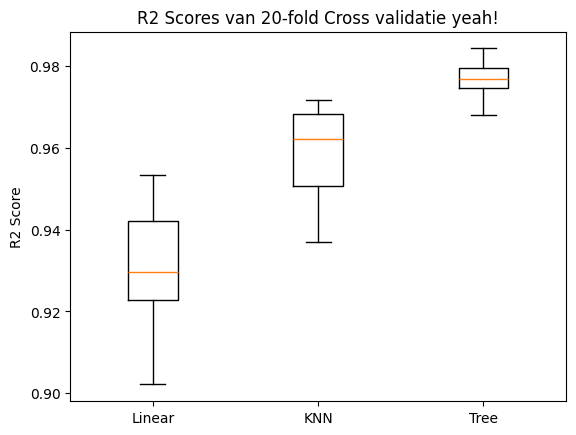

In [32]:
print("Linear Regression mean R2:", lin_scores.mean())
print("KNN Regressor mean R2:", knn_scores.mean())
print("Decision Tree mean R2:", tree_scores.mean())

plt.boxplot([lin_scores, knn_scores, tree_scores], labels=["Linear", "KNN", "Tree"])
plt.title("R2 Scores van 20-fold Cross validatie yeah!")
plt.ylabel("R2 Score")
plt.show()

In [34]:

# Linear vs Tree
_, p_val_lin_tree = stats.ttest_rel(tree_scores, lin_scores)
print("Tree vs Linear Regression p-value:", p_val_lin_tree)

# KNN vs Tree
_, p_val_knn_tree = stats.ttest_rel(tree_scores, knn_scores)
print("Tree vs KNN Regression p-value:", p_val_knn_tree)

Tree vs Linear Regression p-value: 5.004120356022845e-11
Tree vs KNN Regression p-value: 1.2296444048049271e-06


### 23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).

Yeah yeah yeah yeah

In [20]:
# 23

### 24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

Linear Regression vs Tree Regression / KNN

In [21]:
# 24

### 25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


Waarde selecteren om de dataset op te splitsen. Vervolgens kunnen we hierop Logistic Regression gebruiken of een KNN Classifier

In [22]:
# 25

### 26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


1. De 5 meest belangrijke feeatures pakken
2. Een logistic regression model trainen
3. Geef de formule
4. groepsgenoot data invoeren

In [23]:
# 26

### 27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


Bla bla bla

In [24]:
# 27

###